In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
from imblearn.over_sampling import SMOTE
#%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold

from scipy.stats import norm
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

#DS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#KNN
from sklearn.neighbors import KNeighborsClassifier

#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## 1. Loading the dataset

In [2]:
#loading the data from CSV file 
data=pd.read_csv('final_Binary.csv')
data.head()

'''dataFeatures= ['Side Chest Airbag-Driver', 'Side Chest Airbag-Passenger',
       'AEB Vulnerable Road Users', 'Side Head Airbag-Driver',
       'Side Head Airbag-Passenger', 'Seatbelt Reminder-Passenger',
       'AEB Car-to-Car', 'Belt Loadlimiter-Rear', 'Belt Pretensioner-Rear',
       'Side Head Airbag-Rear', 'Lane Assist System', 'Seatbelt Reminder-Rear',
       'Safety Assist', 'Speed Assistance', 'Adult Occupant',
       'Centre Airbag-Driver', 'Child Occupant', 'Tested Model',
       'Isofix/i-Size-Passenger'] '''

dataFeatures= ['Adult Occupant', 'Belt Pretensioner-Rear', 'Safety Assist',
       'Child Occupant', 'Class', 'Side Pelvis Airbag-Rear',
       'AEB Vulnerable Road Users']


In [3]:
# print the columns in the dataset
data.columns

Index(['Adult Occupant', 'Belt Pretensioner-Rear', 'Safety Assist',
       'Child Occupant', 'Class', 'Side Pelvis Airbag-Rear',
       'AEB Vulnerable Road Users', 'Rate'],
      dtype='object')

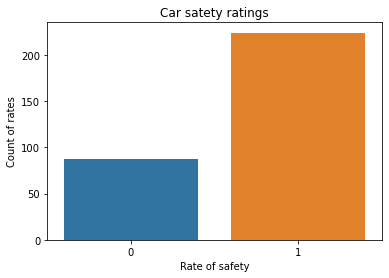

In [4]:
#Data presentation 

sns.countplot(data["Rate"])
plt.xlabel("Rate of safety")
plt.ylabel("Count of rates")
plt.title("Car satety ratings")
plt.show()

In [5]:
'''# Create a MinMaxScaler object for numrical data
scaler = MinMaxScaler()

# Scaling the raw input features 
feature_cols=data.columns[:-1]
X= scaler.fit_transform(data[feature_cols])

print(f"The range of feature inputs are within {X.min()} to {X.max()}")'''

'# Create a MinMaxScaler object for numrical data\nscaler = MinMaxScaler()\n\n# Scaling the raw input features \nfeature_cols=data.columns[:-1]\nX= scaler.fit_transform(data[feature_cols])\n\nprint(f"The range of feature inputs are within {X.min()} to {X.max()}")'

## 2. Split the dataset 

In [6]:

from sklearn.model_selection import StratifiedShuffleSplit

feature_cols=data.columns[:-1]
# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, random_state=0)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data['Rate']))

# Create the dataframes


X_train = data.loc[train_idx, dataFeatures]
y_train = data.loc[train_idx, 'Rate']

X_test  = data.loc[test_idx, dataFeatures]
y_test  = data.loc[test_idx, 'Rate']

print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset shape, X_train: (217, 7), y_train: (217,)
Testing dataset shape, X_test: (94, 7), y_test: (94,)


## 3. Smoot 

In [7]:
X= data.loc[:,dataFeatures]
y= data.loc[:,["Rate"]]

def splitSmote (model):
    # Initialize the Stratified K-fold Cross-validator with 5 splits
    sk=StratifiedKFold(n_splits=5)

    # Initialize the array to store the accuracy scores
    tr_accuracy_scores = []
    tst_accuracy_scores = []

    # Perform cross-validation
    for train_index, test_index in sk.split(X, y):
        # Split the data into training and test sets
        x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:]
        y_train_fold, y_test_fold = y.loc[train_index,:], y.loc[test_index,:]

        smote = SMOTE(sampling_strategy='minority')
        # smote = SMOTE(sampling_strategy=0.5)
        x_sm, y_sm = smote.fit_resample(x_train_fold, y_train_fold)
        #Fit the model to the training data
        model.fit(x_sm, np.ravel(y_sm))
        # Make predictions on the test data
        yTrain_pred = model.predict(x_train_fold)
        yTest_pred = model.predict(x_test_fold)

        # Calculate the accuracy score and append it to the list
        tr_accuracy_scores.append(accuracy_score(y_train_fold, yTrain_pred))
        tst_accuracy_scores.append(accuracy_score(y_test_fold, yTest_pred))
        #Data presentation 

        print("before smote")
        sns.countplot(y_train_fold["Rate"])
        plt.xlabel("Rate of safety")
        plt.ylabel("Count of rates")
        plt.title("Car satety ratings")
        plt.show()

        print("after smote")
        sns.countplot(y_sm["Rate"])
        plt.xlabel("Rate of safety")
        plt.ylabel("Count of rates")
        plt.title("Car satety ratings")
        plt.show()




    # Print the accuracy scores for each fold
    print("Accuracy scores for each training fold: ", tr_accuracy_scores)
    print("Accuracy scores for each testing fold: ", tst_accuracy_scores)

    # Calculate the mean accuracy scores
    print("Traning Mean accuracy score: ", np.mean(tr_accuracy_scores))
    print("Testing Mean accuracy score: ", np.mean(tst_accuracy_scores))

## 4. Data normalization 

In [8]:
y_train.value_counts(normalize=True)

1    0.718894
0    0.281106
Name: Rate, dtype: float64

In [9]:
y_test.value_counts(normalize=True)

1    0.723404
0    0.276596
Name: Rate, dtype: float64

## 4. Models 

### 4.1 Decision Tree 

before optimization

before smote


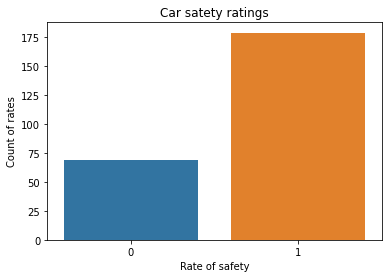

after smote


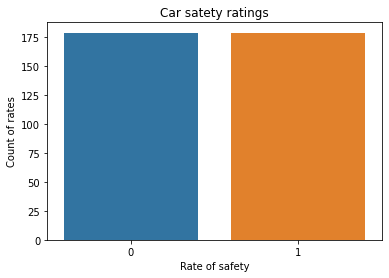

before smote


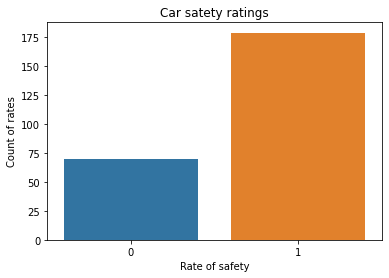

after smote


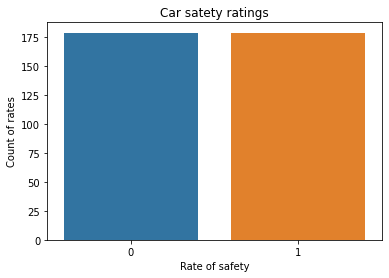

before smote


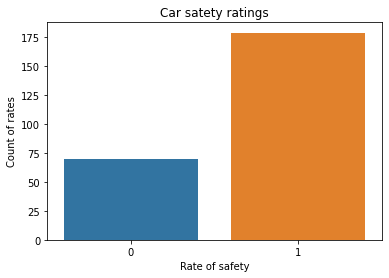

after smote


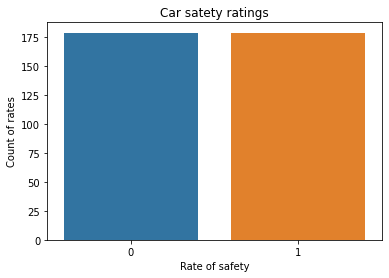

before smote


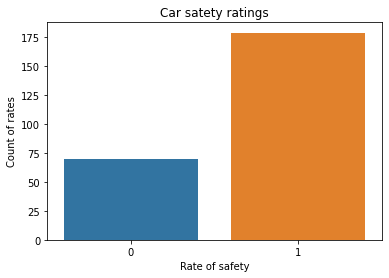

after smote


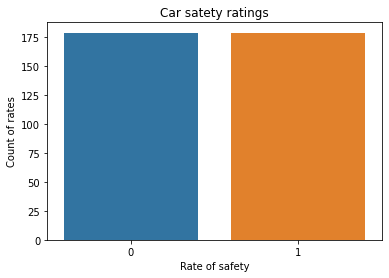

before smote


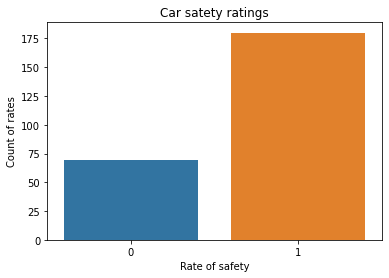

after smote


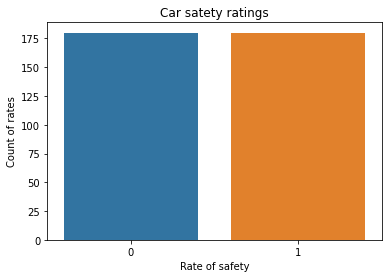

Accuracy scores for each training fold:  [1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy scores for each testing fold:  [0.9365079365079365, 0.967741935483871, 0.7903225806451613, 0.967741935483871, 0.7096774193548387]
Traning Mean accuracy score:  1.0
Testing Mean accuracy score:  0.8743983614951357


In [10]:
# DecisionTreeClassifier
#importing the classfier
metrics=[]

clf=DecisionTreeClassifier(random_state=0)
#clf2=clf.fit(X_train,y_train)


#y_pred.append(pd.Series(clf2.predict(X_test), name='DecisionTreeClassifier'))
# Preciision, recall, f-score from the multi-class support function

# precision, recall, fscore, _ = score(y_test, clf2.predict(X_test), average='weighted')
# accuracy = accuracy_score(y_test, clf2.predict(X_test))
# metrics.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))


splitSmote (clf)

After optimization

In [11]:
# DecisionTree opt


#optimization
param_grid={
"max_depth":[2,4,6],
"min_samples_split":[2,5,10],
"min_samples_leaf":[1,2,4]}
grid_search= GridSearchCV(estimator=clf,param_grid=param_grid,cv=5)

# grid_search.fit(X_train,y_train)
# print("Best hyper-param: ",grid_search.best_params_ )
# print("Best estimator: ",grid_search.best_estimator_ )
# print("Best score: ",grid_search.best_score_ )


# #precision, recall, fscore, _ = score(y_test, grid_search.predict(X_test), average='weighted')
# accuracy = accuracy_score(y_test, grid_search.predict(X_test))
# metrics.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))


#splitSmote (kCls)

grid_search
before smote


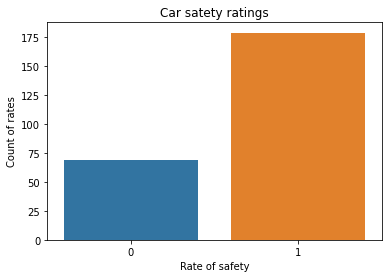

after smote


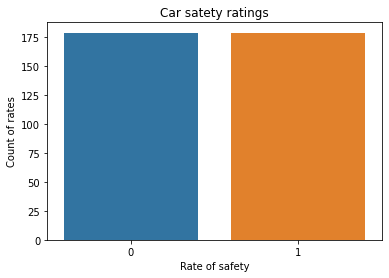

before smote


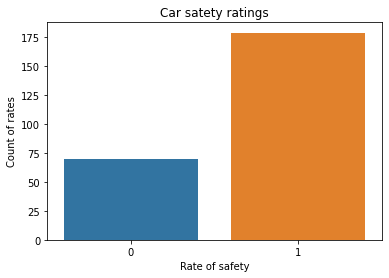

after smote


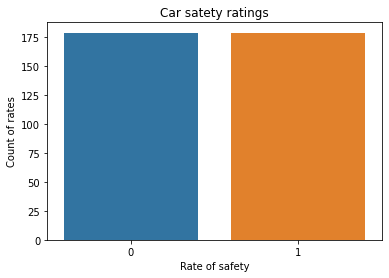

before smote


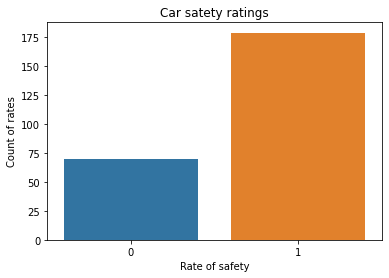

after smote


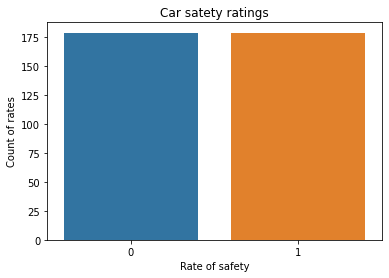

before smote


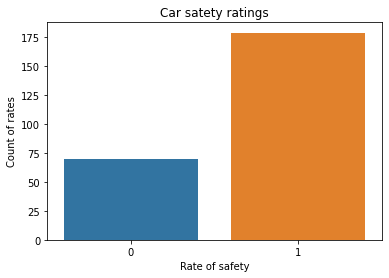

after smote


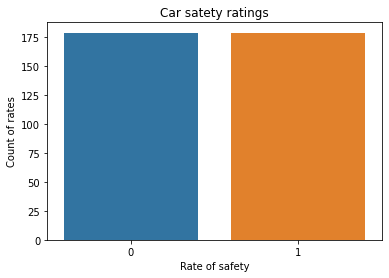

before smote


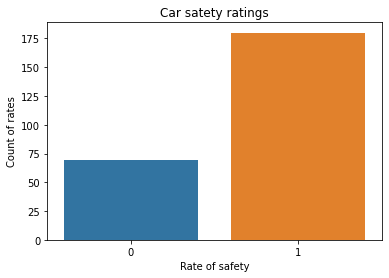

after smote


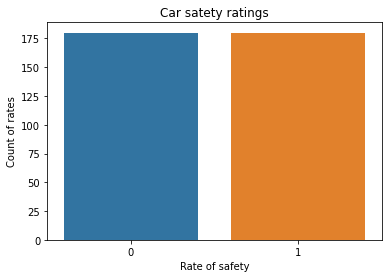

Accuracy scores for each training fold:  [0.9395161290322581, 0.9718875502008032, 0.9759036144578314, 0.9156626506024096, 0.9678714859437751]
Accuracy scores for each testing fold:  [0.9365079365079365, 0.9516129032258065, 0.7741935483870968, 0.9354838709677419, 0.7580645161290323]
Traning Mean accuracy score:  0.9541682860474154
Testing Mean accuracy score:  0.8711725550435228


In [12]:
#DT aftar opt

print("grid_search")

splitSmote(grid_search)

### 4.2 KNN

Before optimization

before smote


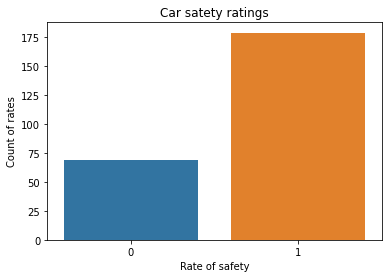

after smote


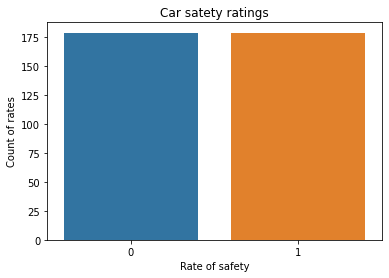

before smote


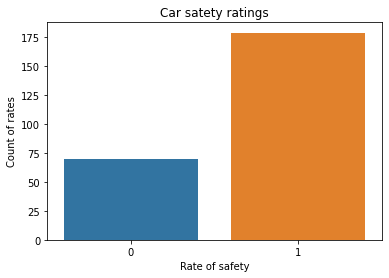

after smote


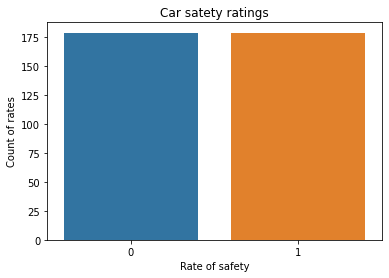

before smote


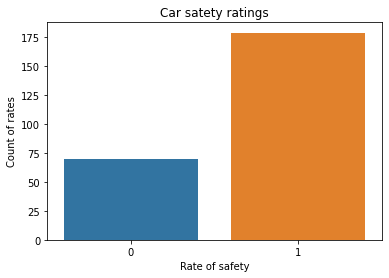

after smote


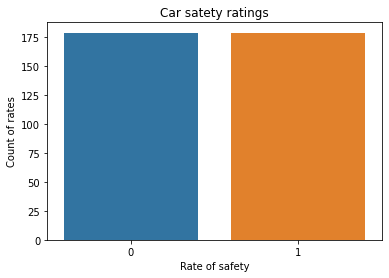

before smote


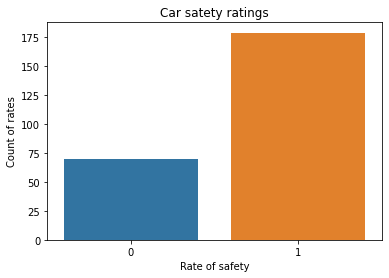

after smote


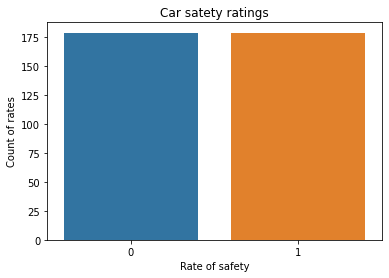

before smote


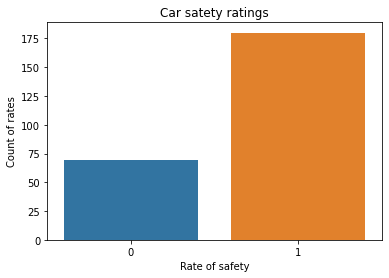

after smote


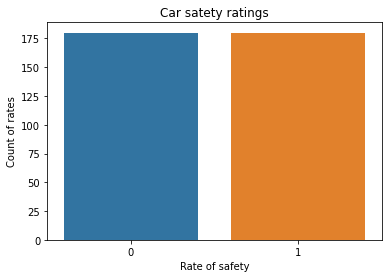

Accuracy scores for each training fold:  [0.9395161290322581, 0.927710843373494, 0.9678714859437751, 0.9357429718875502, 0.9518072289156626]
Accuracy scores for each testing fold:  [0.9206349206349206, 0.9032258064516129, 0.7903225806451613, 0.9354838709677419, 0.6612903225806451]
Traning Mean accuracy score:  0.944529731830548
Testing Mean accuracy score:  0.8421915002560164


In [ ]:
# KNN
#importing the classfier

kCls=KNeighborsClassifier()
splitSmote (kCls)
#kCls.fit(X_train,y_train)

#y_pred.append(pd.Series(kCls.predict(X_test), name='KNeighborsClassifier'))

#precision, recall, fscore, _ = score(y_test, kCls.predict(X_test), average='weighted')
#accuracy = accuracy_score(y_test, kCls.predict(X_test))
#metrics.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))

#kCls=KNeighborsClassifier(n_neighbors=9)


After optimization

In [ ]:
#TODO: Write the code here

### 4.3 GradientBoosting

Before optimization

before smote


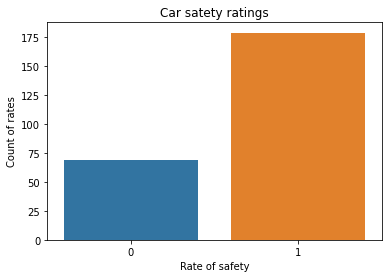

after smote


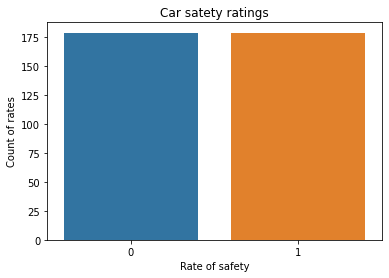

before smote


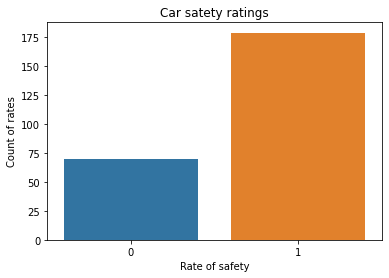

after smote


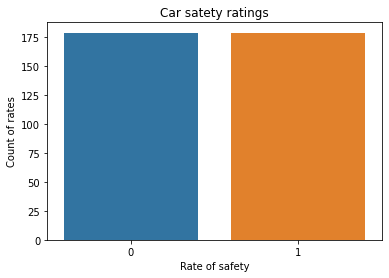

before smote


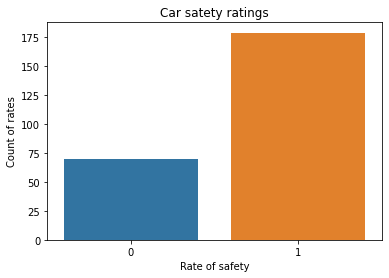

after smote


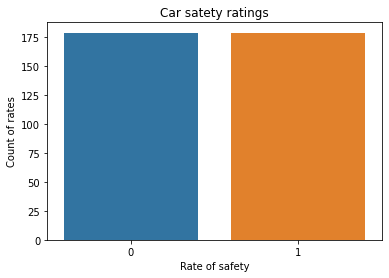

before smote


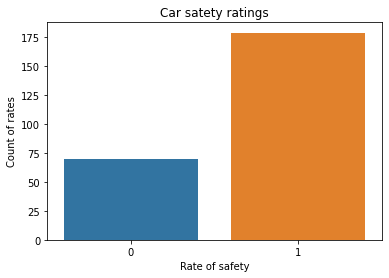

after smote


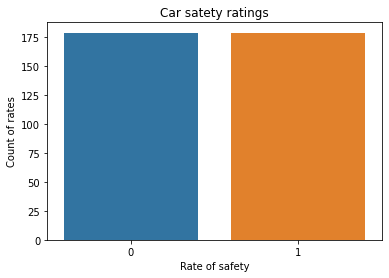

before smote


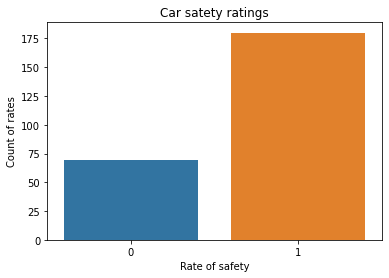

after smote


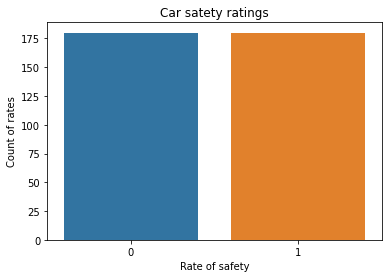

Accuracy scores for each training fold:  [0.9919354838709677, 0.9959839357429718, 1.0, 0.9959839357429718, 1.0]
Accuracy scores for each testing fold:  [0.9365079365079365, 1.0, 0.7741935483870968, 0.967741935483871, 0.7258064516129032]
Traning Mean accuracy score:  0.9967806710713824
Testing Mean accuracy score:  0.8808499743983615


In [15]:
# GradientBoostingClassifier
#importing the classfier

gb_clf = GradientBoostingClassifier()
splitSmote(gb_clf)


After optimization

before smote


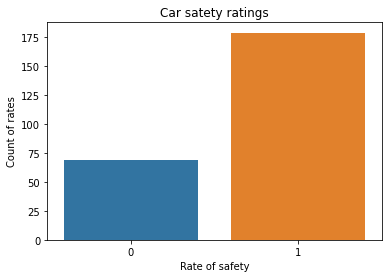

after smote


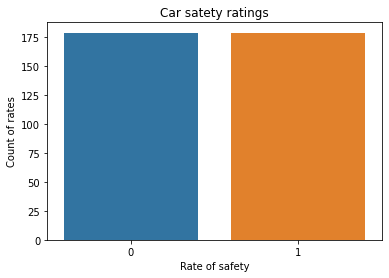

before smote


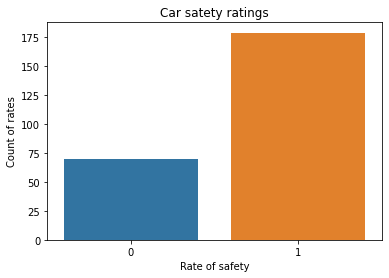

after smote


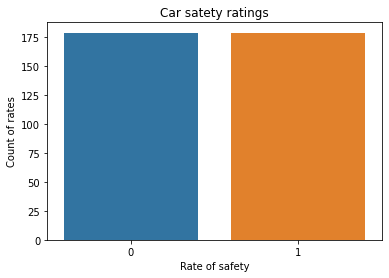

before smote


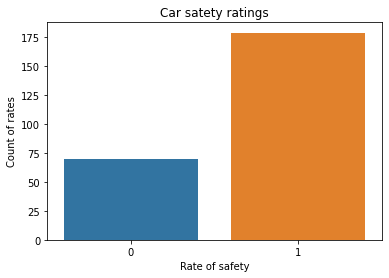

after smote


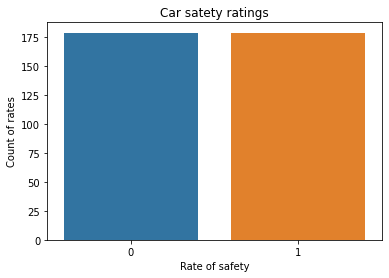

before smote


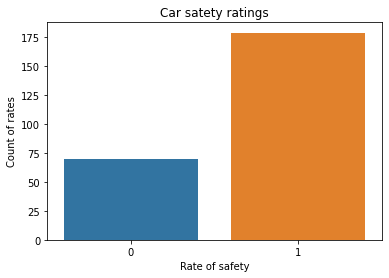

after smote


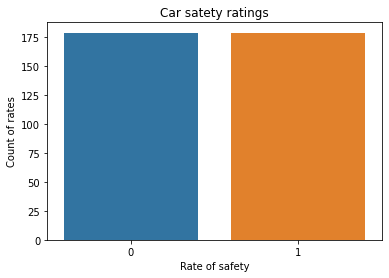

before smote


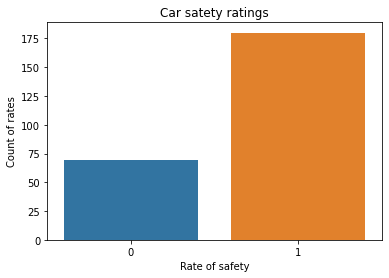

after smote


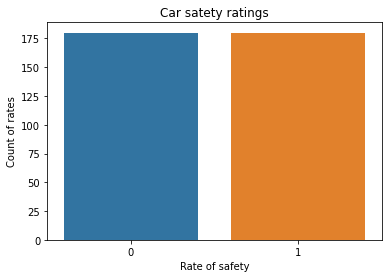

Accuracy scores for each training fold:  [0.9758064516129032, 0.9357429718875502, 0.9759036144578314, 1.0, 0.9959839357429718]
Accuracy scores for each testing fold:  [0.9206349206349206, 0.9838709677419355, 0.7903225806451613, 0.967741935483871, 0.7419354838709677]
Traning Mean accuracy score:  0.9766873947402512
Testing Mean accuracy score:  0.8809011776753712


In [16]:
# optimizing the GradientBoostingClassifier using RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [20,50,70,100], 
                'learning_rate' : [0.01, 0.02, 0.03, 0.04], 
                'max_depth' : [4,6,8,10],
                'subsample' : [0.9, 0.7 ,0.5 , 0.2 ],
                'max_features' :[3,5,7]
                }

grid = GridSearchCV(estimator= gb_clf, 
                    param_grid= parameters, 
                    cv= 2,
                    n_jobs= -1)


grid.fit(X_train, y_train)
splitSmote(grid)





In [18]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)
print(grid.cv_results_)

GradientBoostingClassifier(learning_rate=0.03, max_depth=6, max_features=3,
                           n_estimators=70, subsample=0.7)
0.9666666666666666
{'learning_rate': 0.03, 'max_depth': 6, 'max_features': 3, 'n_estimators': 70, 'subsample': 0.7}
{'mean_fit_time': array([0.03597438, 0.03197765, 0.03197825, 0.03197873, 0.08394444,
       0.08394539, 0.08794236, 0.07994473, 0.10792768, 0.10393035,
       0.11192513, 0.0959357 , 0.15189958, 0.15189958, 0.15989375,
       0.13191283, 0.03597546, 0.03197825, 0.03197825, 0.03197885,
       0.087942  , 0.07594991, 0.07594895, 0.07195187, 0.11592293,
       0.10792863, 0.1079284 , 0.10792816, 0.16389203, 0.17588389,
       0.15989399, 0.15189934, 0.027982  , 0.03197742, 0.03597546,
       0.02798188, 0.0719527 , 0.07195175, 0.06795585, 0.07595026,
       0.10393536, 0.11592329, 0.11192644, 0.12187517, 0.1598947 ,
       0.16389179, 0.16389203, 0.15989459, 0.05196548, 0.05596256,
       0.05596304, 0.05196619, 0.14114523, 0.14913976, 0.1451

before smote


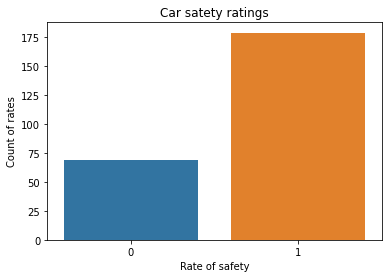

after smote


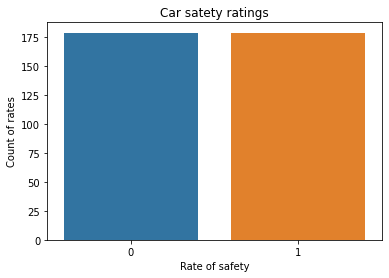

before smote


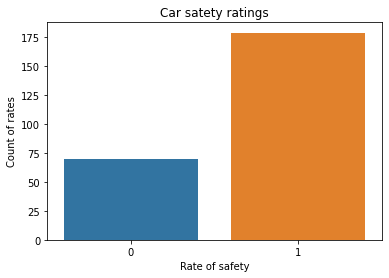

after smote


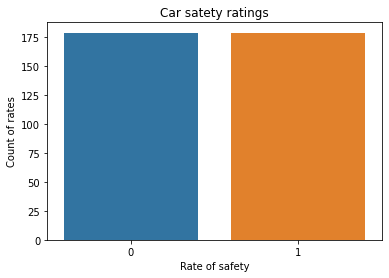

before smote


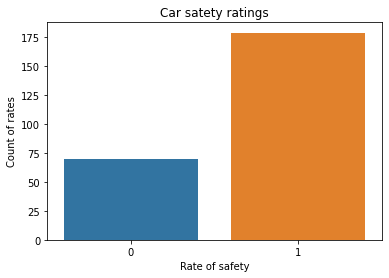

after smote


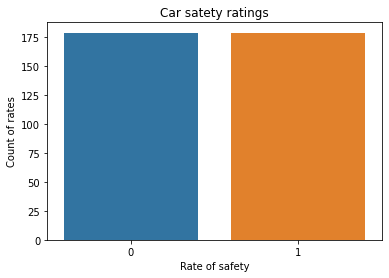

before smote


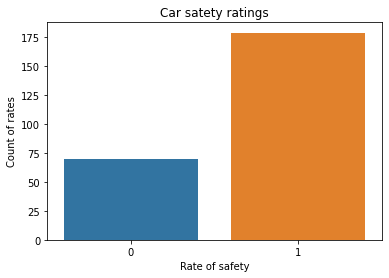

after smote


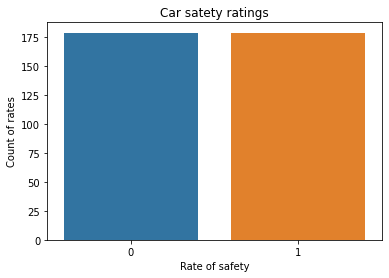

before smote


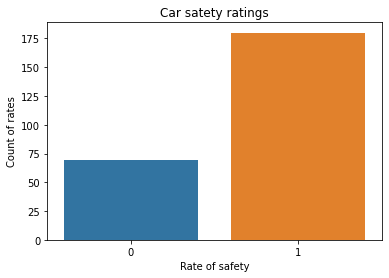

after smote


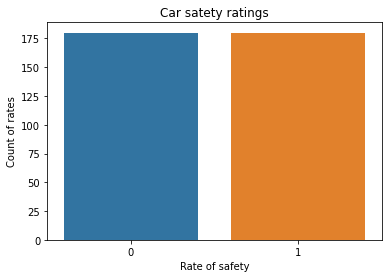

Accuracy scores for each training fold:  [0.9838709677419355, 0.9879518072289156, 0.9959839357429718, 0.9879518072289156, 0.9919678714859438]
Accuracy scores for each testing fold:  [0.9206349206349206, 1.0, 0.7903225806451613, 0.9838709677419355, 0.7096774193548387]
Traning Mean accuracy score:  0.9895452778857365
Testing Mean accuracy score:  0.8809011776753712


In [19]:
opt_gb_clf = GradientBoostingClassifier(learning_rate=0.02, 
                                        max_depth= 6, 
                                        subsample=0.5, 
                                        n_estimators = 70, 
                                        max_features = 7)


opt_gb_clf.fit(X_train, y_train)
splitSmote(opt_gb_clf)

the best until now

learning_rate=0.03, 
                                        max_depth= 6, 
                                        subsample=0.5, 
                                        n_estimators = 50, 
                                        max_features = 7)

### 4.4 LogisticRegression

Before optimization

LogisticRegression
before smote


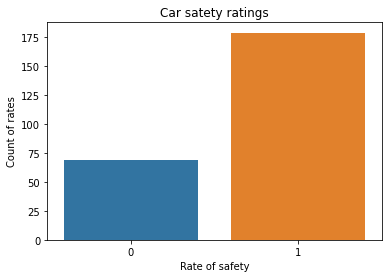

after smote


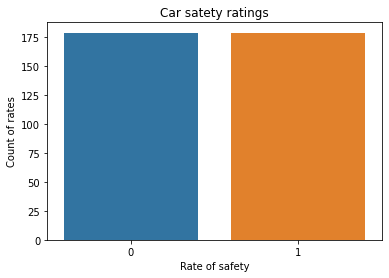

before smote


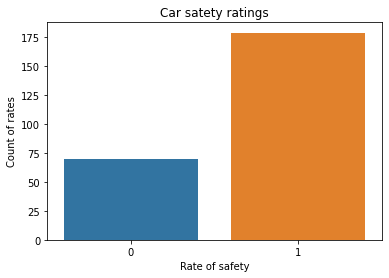

after smote


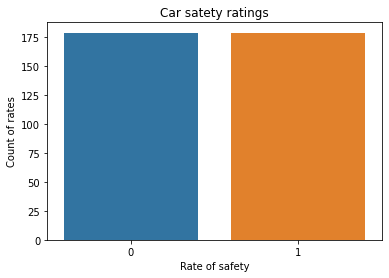

before smote


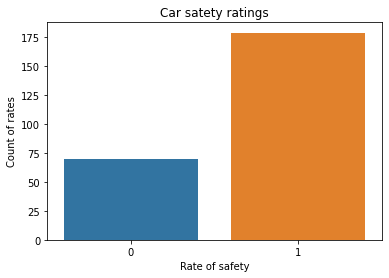

after smote


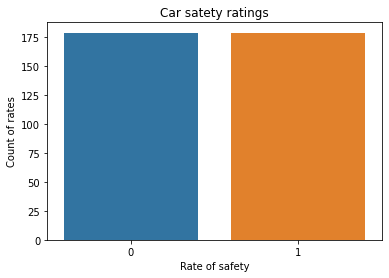

before smote


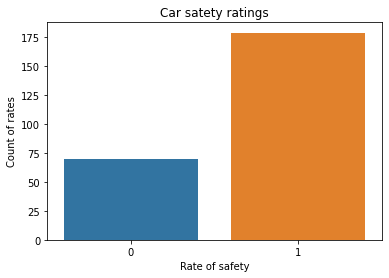

after smote


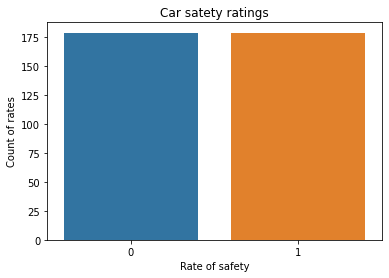

before smote


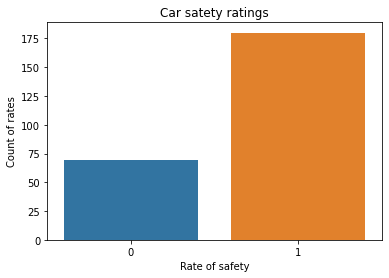

after smote


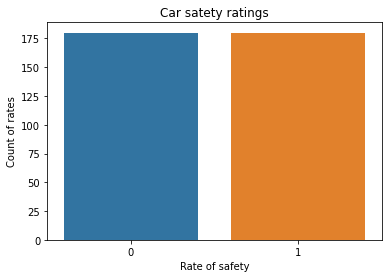

Accuracy scores for each training fold:  [0.8911290322580645, 0.8634538152610441, 0.9397590361445783, 0.8714859437751004, 0.9357429718875502]
Accuracy scores for each testing fold:  [0.8412698412698413, 0.9516129032258065, 0.8225806451612904, 0.9516129032258065, 0.5967741935483871]
Traning Mean accuracy score:  0.9003141598652675
Testing Mean accuracy score:  0.8327700972862264


In [20]:
#TODO: write LogisticRegression optimization code here

logreg=LogisticRegression()
print("LogisticRegression")
splitSmote (logreg)

After optimization

before smote


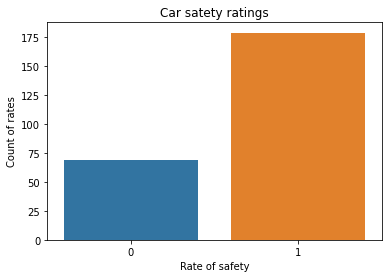

after smote


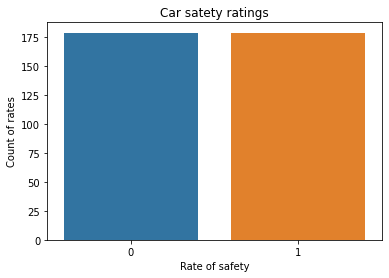

before smote


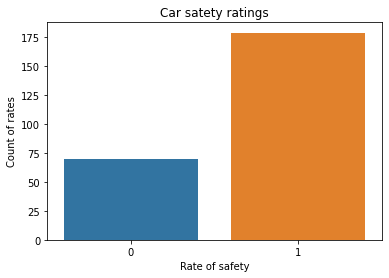

after smote


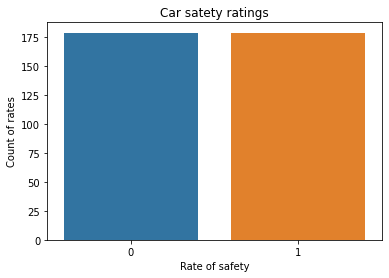

before smote


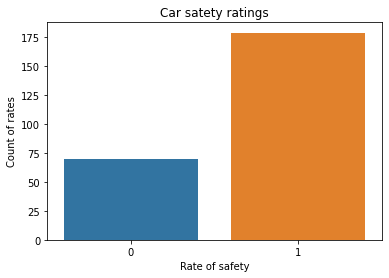

after smote


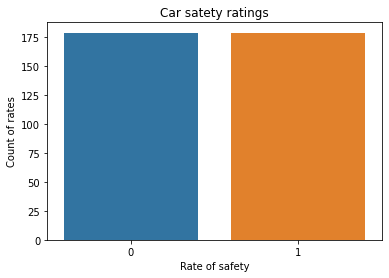

before smote


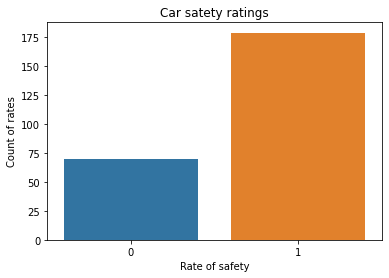

after smote


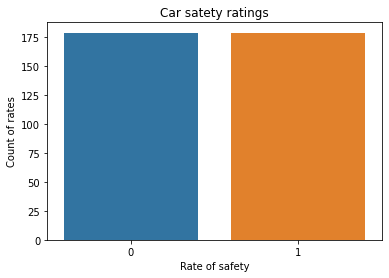

before smote


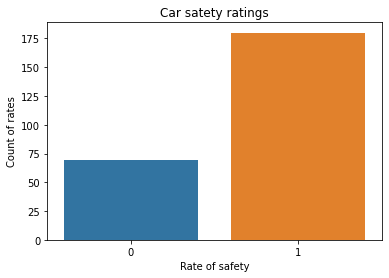

after smote


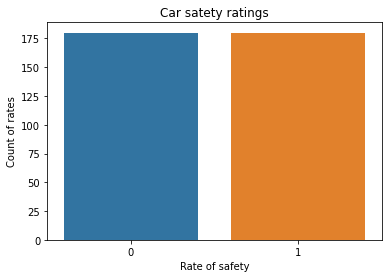

Accuracy scores for each training fold:  [0.9032258064516129, 0.8674698795180723, 0.9397590361445783, 0.8755020080321285, 0.9357429718875502]
Accuracy scores for each testing fold:  [0.8571428571428571, 0.9516129032258065, 0.8064516129032258, 0.9193548387096774, 0.5967741935483871]
Traning Mean accuracy score:  0.9043399404067884
Testing Mean accuracy score:  0.8262672811059909


In [21]:
#LogisticRegression

#Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2","elasticnet"], 'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}
logreg=LogisticRegression()
lr=GridSearchCV(logreg,grid,cv=10)
# lr.fit(X_train,y_train)

# a=lr.best_params_
# b=lr.best_score_
# print("tuned hpyerparameters :(best parameters) ",lr.best_params_)
# print("accuracy :",lr.best_score_)
# print("Best estimator: ",lr.best_estimator_ )

#y_pred.append(pd.Series(lr.predict(X_test), name='LogisticRegression'))

# precision, recall, fscore, _ = score(y_test, lr.predict(X_test), average='weighted')
# accuracy = accuracy_score(y_test, lr.predict(X_test))
# metrics.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))
#LogisticRegression
#from sklearn.linear_model import LogisticRegressionCV
#lr= LogisticRegressionCV(Cs=a['C'], penalty=a['penalty'], solver=a['solver']).fit(X_train, y_train)

splitSmote (lr)

### 4.5 Random Forest

Before optimization

before smote


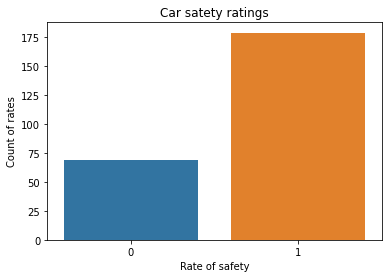

after smote


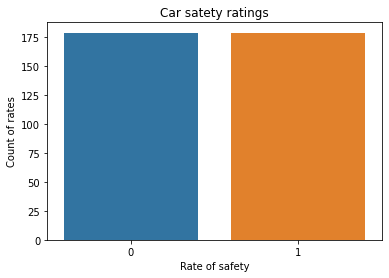

before smote


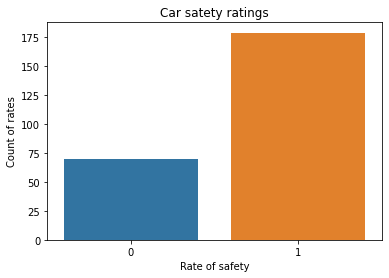

after smote


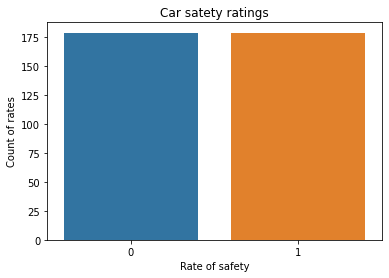

before smote


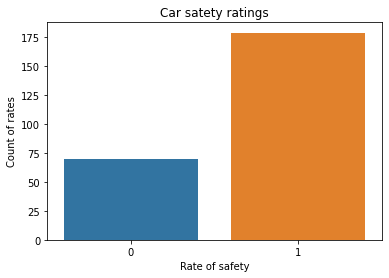

after smote


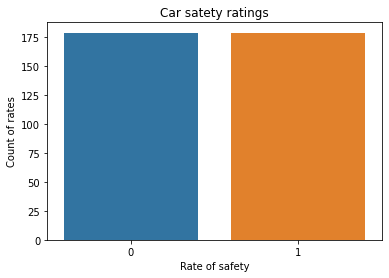

before smote


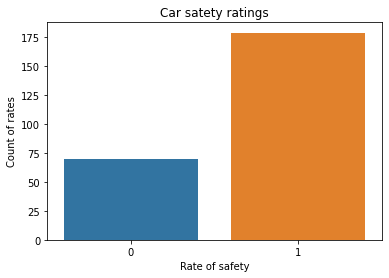

after smote


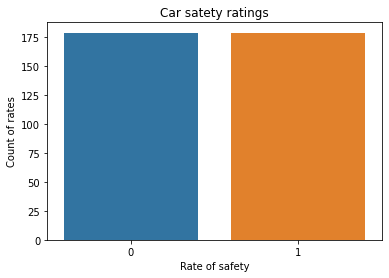

before smote


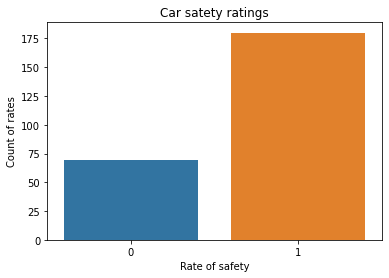

after smote


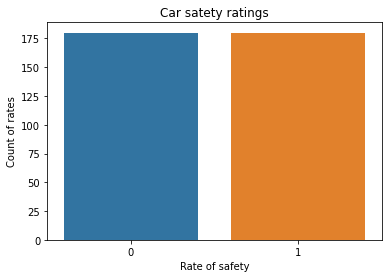

Accuracy scores for each training fold:  [1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy scores for each testing fold:  [0.9523809523809523, 1.0, 0.7903225806451613, 0.967741935483871, 0.7741935483870968]
Traning Mean accuracy score:  1.0
Testing Mean accuracy score:  0.8969278033794164


In [22]:
#RandomForestClassifier
RF= RandomForestClassifier(random_state= 0)
# RF.fit(X_train,y_train)

# #y_pred.append(pd.Series(RF.predict(X_test), name='RandomForestClassifier'))

# precision, recall, fscore, _ = score(y_test, RF.predict(X_test), average='weighted')
# accuracy = accuracy_score(y_test, RF.predict(X_test))
# metrics.append(pd.Series({'precision':precision, 'recall':recall,'fscore':fscore, 'accuracy':accuracy}))


splitSmote (RF)

After optimization

random_search
before smote


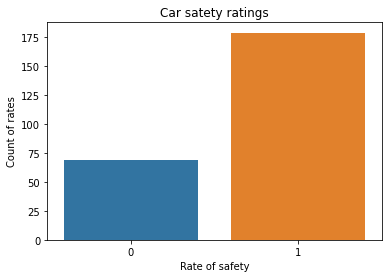

after smote


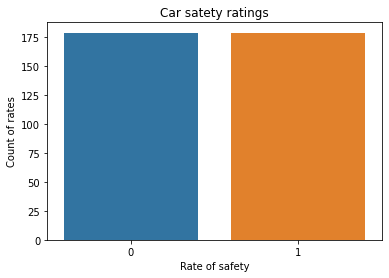

before smote


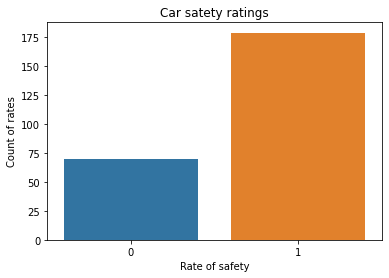

after smote


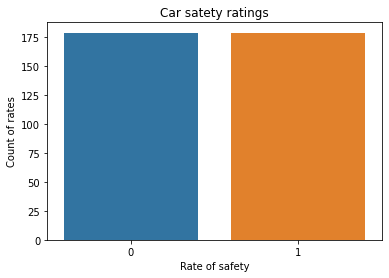

before smote


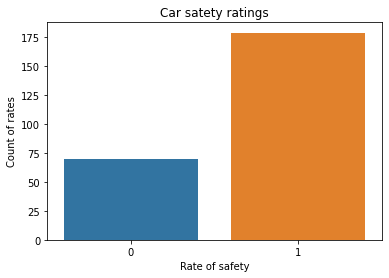

after smote


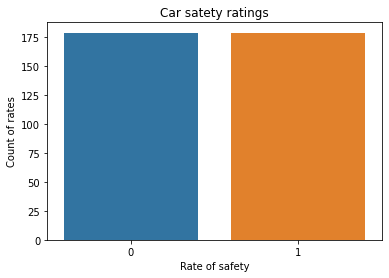

before smote


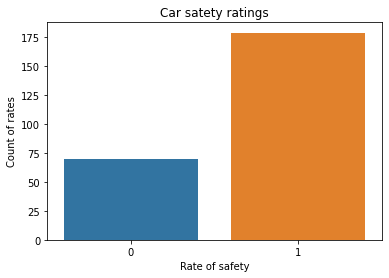

after smote


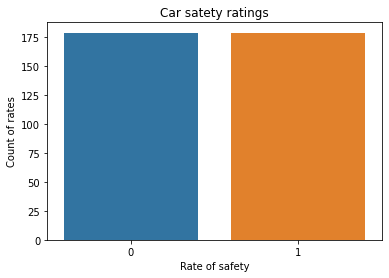

before smote


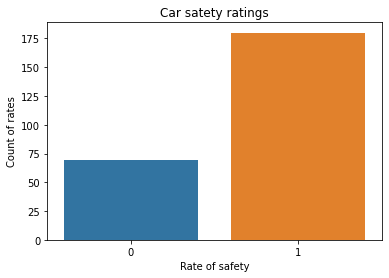

after smote


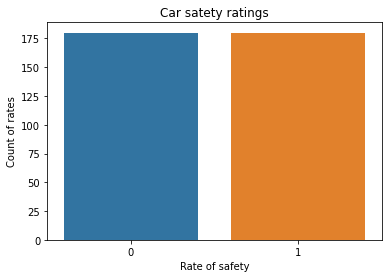

Accuracy scores for each training fold:  [0.9596774193548387, 0.9558232931726908, 0.9839357429718876, 0.9558232931726908, 0.9879518072289156]
Accuracy scores for each testing fold:  [0.9047619047619048, 1.0, 0.7903225806451613, 0.967741935483871, 0.7580645161290323]
Traning Mean accuracy score:  0.9686423111802048
Testing Mean accuracy score:  0.8841781874039938


In [23]:
#TODO: Write RandomForest optimization code here

#RandomForest optimization
random_grid={
"max_depth":[2,4,6],
"min_samples_split":[2,5,10],
"min_samples_leaf":[1,2,4]}
random_search= GridSearchCV(estimator=RF,param_grid=random_grid,cv=5)


print("random_search")
random_search.fit(X_train, y_train)
splitSmote(random_search)


In [26]:
print(random_search.best_estimator_)
print(random_search.best_score_)
print(random_search.best_params_)
print(random_search.cv_results_)

RandomForestClassifier(max_depth=6, random_state=0)
0.9583333333333333
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'mean_fit_time': array([0.1087347 , 0.10640769, 0.10392356, 0.1023243 , 0.10282722,
       0.10392995, 0.10392509, 0.10242062, 0.10393062, 0.14567189,
       0.13418612, 0.11192517, 0.10584745, 0.10519505, 0.10713005,
       0.10552969, 0.10558672, 0.10553584, 0.11033735, 0.10341353,
       0.10751157, 0.10872087, 0.10708652, 0.10940323, 0.10712385,
       0.10585284, 0.10616951]), 'std_fit_time': array([9.60740737e-03, 4.61520631e-03, 2.51153350e-05, 3.19587714e-03,
       2.23887825e-03, 1.97530332e-05, 1.26038443e-05, 3.14206951e-03,
       2.21945032e-05, 8.22463140e-03, 1.53566049e-02, 1.23840610e-02,
       3.10185025e-03, 3.75174345e-03, 3.91749892e-03, 3.19831396e-03,
       4.40556736e-03, 3.19502671e-03, 3.18067459e-03, 1.03430843e-03,
       3.67386681e-03, 3.92517663e-03, 3.96519690e-03, 4.64349245e-03,
       4.24755950e-03, 3.10040786e-03

## 5. Training

### 5.1 Before Optimazation 

In [ ]:
# Base models 
kCls=KNeighborsClassifier()
print("KNN")
splitSmote (kCls)

gb_clf2 = GradientBoostingClassifier()
print("GradientBoosting")
splitSmote (gb_clf2)

logreg=LogisticRegression()
print("LogisticRegression")
splitSmote (logreg)

RF= RandomForestClassifier()
print("RandomForest")
splitSmote (RF)

clf=DecisionTreeClassifier()
print("DecisionTree")
splitSmote (clf)






KNN
Accuracy scores for each fold:  [0.9365079365079365, 0.9193548387096774, 0.7903225806451613, 0.9516129032258065, 0.7741935483870968]
Mean accuracy score:  0.8743983614951356
GradientBoosting
Accuracy scores for each fold:  [0.9682539682539683, 1.0, 0.7903225806451613, 0.9838709677419355, 0.7419354838709677]
Mean accuracy score:  0.8968766001024064
LogisticRegression
Accuracy scores for each fold:  [0.9047619047619048, 1.0, 0.8225806451612904, 0.967741935483871, 0.6612903225806451]
Mean accuracy score:  0.8712749615975423
RandomForest


C:\Users\rayoo\AppData\Local\Temp\ipykernel_45220\3765096017.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_sm, y_sm)
C:\Users\rayoo\AppData\Local\Temp\ipykernel_45220\3765096017.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_sm, y_sm)
C:\Users\rayoo\AppData\Local\Temp\ipykernel_45220\3765096017.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_sm, y_sm)
C:\Users\rayoo\AppData\Local\Temp\ipykernel_45220\3765096017.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_sm, y_sm)


Accuracy scores for each fold:  [0.9523809523809523, 1.0, 0.7903225806451613, 0.967741935483871, 0.7741935483870968]
Mean accuracy score:  0.8969278033794164
DecisionTree
Accuracy scores for each fold:  [0.9841269841269841, 0.967741935483871, 0.7903225806451613, 0.9516129032258065, 0.7096774193548387]
Mean accuracy score:  0.8806963645673322


C:\Users\rayoo\AppData\Local\Temp\ipykernel_45220\3765096017.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_sm, y_sm)


### After Optimization

In [ ]:
#TODO: write the code here

## 5. Evaluation

### 5.1 Before Optimization

In [ ]:

def report( y_test, pred ):
    #report 
    print(classification_report(y_test,pred,target_names=['0','1','2','3','4','5']))


def confusionMatrix():
    #confusion_matrix
    #the result will show how mwny sucessful predition and wrong from each class

    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(10,7))

    sns.heatmap(cm, annot=True, fmt='.2g', cmap='Blues')

    # TN   FP
    # FN   TP

In [ ]:
metrics = pd.concat(metrics, axis=1,names=['DecisionTree','DecisionTreeOpt','KNN','GradientBoosting','LogisticRegression','RandomForest'])


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [ ]:
metrics.columns=['DecisionTree','DecisionTreeOpt','KNN','GradientBoosting','LogisticRegression','RandomForest']
metrics

,DecisionTree,DecisionTreeOpt,KNN,GradientBoosting,LogisticRegression,RandomForest
precision,1.0,1.0,0.733490,0.963374,0.961147,0.944874
recall,1.0,1.0,0.776596,0.968085,0.968085,0.968085
fscore,1.0,1.0,0.749230,0.963933,0.962621,0.954647
accuracy,1.0,1.0,0.776596,0.968085,0.968085,0.968085


### 5.2 After Optimization

In [ ]:
#TODO: write the code here